In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path.append('/nethome/jbang36/eko')


In [3]:
### let's run the experiment and get the results

video_name = 'dashcam960'

from eko_paper2022.motivation.main import *

images = load_dataset(video_name)


11-25-2022 12:33:08 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam960/video.mp4 is (74880, 540, 960, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam960/video.mp4 is (74880, 540, 960, 3)
100%|██████████| 74880/74880 [01:20<00:00, 927.07it/s]


In [26]:
##3parameters
anchor_count_param = 0.1
aggregate_error_param = 0.02
precision_invoc_param = 0.05
dnn_invocation = int(len(images) * precision_invoc_param)

c_param = 2

In [5]:
category = 'car'

In [6]:
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

from eko_paper2022.experiments.main import *


In [6]:
### okay, run all the ekos for the percentages....

In [7]:
thr = 1 / 140

In [27]:
import time
from eko_paper2022.experiments.main import execute_ekomab

ekos = []
index_construction_times = []
anchor_count = int( len(images) * anchor_count_param )

for percentage in percentages:
    st = time.perf_counter()
    eko_mab = execute_ekomab(images, video_name, category = category, nb_buckets = anchor_count, anchor_percentage = percentage, c_param = c_param)
    
    ekos.append(eko_mab)
    index_construction_times.append(time.perf_counter() - st + anchor_count * percentage * thr)
    
    
    

index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 6240 frames in 0.6348259747028351 seconds
adfasdfasdfsaf 7488 0.2 1497
total number of iframes:  6240
total number of anchors selected in index construction:  1497
final number that has been selected:  1497
bucketing complete!


Target DNN Invocations:   0%|          | 0/1497 [00:00<?, ?it/s]

index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 6240 frames in 0.6427686735987663 seconds
adfasdfasdfsaf 7488 0.4 2995
total number of iframes:  6240
total number of anchors selected in index construction:  2995
final number that has been selected:  2995
bucketing complete!


Target DNN Invocations:   0%|          | 0/2995 [00:00<?, ?it/s]

index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 6240 frames in 0.6284547299146652 seconds
adfasdfasdfsaf 7488 0.6 4492
total number of iframes:  6240
total number of anchors selected in index construction:  4492
final number that has been selected:  4492
bucketing complete!


Target DNN Invocations:   0%|          | 0/4492 [00:00<?, ?it/s]

index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 6240 frames in 0.6262103505432606 seconds
adfasdfasdfsaf 7488 0.8 5990
total number of iframes:  6240
total number of anchors selected in index construction:  5990
final number that has been selected:  5990
bucketing complete!


Target DNN Invocations:   0%|          | 0/5990 [00:00<?, ?it/s]

index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
returning 6240 frames in 0.6326755098998547 seconds
adfasdfasdfsaf 7488 1.0 7488
total number of iframes:  6240
total number of anchors selected in index construction:  7488
final number that has been selected:  6241
bucketing complete!


Target DNN Invocations:   0%|          | 0/6241 [00:00<?, ?it/s]

In [14]:
images.shape

(100000, 540, 960, 3)

In [15]:
index_construction_times

[8.706464563629456,
 15.870452041072504,
 22.62891292518803,
 30.21950146981648,
 36.88860845725451]

In [19]:
#### so it doesn't really matter how many anchors we select during index construction, it basically stays the same
from eko_paper2022.experiments.main import query_process_aggregate

#### let's do query processing.... do query 1, 2, 3, 
eko_times = []
for eko in ekos:
    query, times = query_process_aggregate(eko, error = aggregate_error_param)
    eko_times.append(times)


100%|██████████| 8000/8000 [01:44<00:00, 76.68it/s] 


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 4.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             46064.0
debiased_estimate            46141.743226916355
nb_samples                   5251
y_pred                       [          0           0           0 ...           2           2           2]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              46259.0


100%|██████████| 6000/6000 [01:34<00:00, 63.56it/s] 


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 4.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             45881.0
debiased_estimate            45702.56009133285
nb_samples                   5105
y_pred                       [          0           0           0 ...           2           2           2]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              46259.0


100%|██████████| 4000/4000 [01:21<00:00, 49.31it/s]


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 4.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             45500.5
debiased_estimate            45878.141380928326
nb_samples                   5335
y_pred                       [          0           0           0 ...           2           2           2]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              46259.0


100%|██████████| 2000/2000 [00:42<00:00, 47.00it/s]


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 4.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             45689.0
debiased_estimate            46145.55899330164
nb_samples                   5166
y_pred                       [          0           0           0 ...           2           2           2]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              46259.0


100%|██████████| 1665/1665 [00:36<00:00, 45.27it/s]


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 4.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             45580.5
debiased_estimate            46451.77726245325
nb_samples                   5186
y_pred                       [          0           0           0 ...           2           2           2]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              46259.0


In [ ]:
46, 44, 35, 42, 38
46, 40, 38, 36, 36
44, 49, 39, 38, 36


In [11]:
eko_times

[49.03596685198801,
 45.93999642335943,
 42.09255796734776,
 29.16294353753328,
 16.894375141390732]

In [12]:
### we need to add in additional times....
query_anchor_times = []
for percentage in percentages:
    query_anchor_time = ((anchor_count) * (1 - percentage)) * thr
    query_anchor_times.append(query_anchor_time)

In [13]:
eko_final_times = np.array(eko_times) + np.array(query_anchor_times)

In [14]:
query_anchor_times

[28.57142857142857,
 21.428571428571427,
 14.285714285714285,
 7.142857142857141,
 0.0]

In [15]:
index_construction_times

[8.646330178848334,
 15.83990008224334,
 22.777684878025735,
 30.11878348567656,
 37.150178840117796]

In [16]:
eko_times

[49.03596685198801,
 45.93999642335943,
 42.09255796734776,
 29.16294353753328,
 16.894375141390732]

In [17]:
index_construction_times

[8.646330178848334,
 15.83990008224334,
 22.777684878025735,
 30.11878348567656,
 37.150178840117796]

In [28]:
## perform experiments for q2 and q3

cherry_p = []
cherry_r = []
for eko in ekos:
    precision, recall = query_process_precision(eko, dnn_invocation = dnn_invocation)
    cherry_p.append(precision)
    cherry_r.append(recall)
    


100%|██████████| 5991/5991 [00:19<00:00, 303.97it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

100%|██████████| 4493/4493 [00:16<00:00, 271.54it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

100%|██████████| 2996/2996 [00:12<00:00, 242.12it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

100%|██████████| 1498/1498 [00:06<00:00, 214.13it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

100%|██████████| 1247/1247 [00:05<00:00, 214.30it/s]


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

In [29]:
cherry_p, cherry_r

([0.9678173363186773,
  0.9665683382497542,
  0.9672143280047365,
  0.9574286636242105,
  0.967385404845315],
 [0.8689745062519331,
  0.8686431317103345,
  0.8661467768302921,
  0.9176644722308134,
  0.8662572350108249])

In [ ]:
def f1_score(precisions, recalls):
    f1s = []
    for precision, recall in zip(precisions, recalls):
        f1s.append(2* precision * recall / (precision + recall))
    return f1s

In [9]:
def f1_score2(arr):
    result = []
    for p,r in arr:
        result.append( 2 * p * r / (p + r) )
        
    return np.array(result)

In [ ]:
index_construction_times

In [ ]:
eko_final_times

In [3]:
import numpy as np

In [10]:
a = np.array([7595, 7399, 7284, 7116, 7163])
b = np.array([5637, 5668, 5678, 5449, 5423])
c = np.array([5339, 5200, 5354, 5103, 5190])

a = a / max(a)
b = b / max(b)
c = c / max(c)

data1 = np.array([a,b,c])

In [11]:
a = np.array([10166, 10012, 10253, 9450, 9310])
b = np.array([9985, 9290, 9237, 8690, 7547])
c = np.array([8718, 8396, 7964, 7904, 7572])

a = a / max(a)
b = b / max(b)
c = c / max(c)

data3 = np.array([a,b,c])

In [12]:

a = np.array([(0.78, 0.1), (0.92, 0.69), (0.8, 0.1), (0.79, 0.1), (0.79, 0.1)])
b = np.array([(0.96, 0.86), (0.95, 0.9), (0.96, 0.9), (0.96, 0.89), (0.96, 0.9)])
c = np.array([(0.97, 0.92), (0.95, 0.95), (0.95, 0.95), (0.97, 0.92), (0.95, 0.94)])

a = f1_score2(a)
b = f1_score2(b)
c = f1_score2(c)

a = 1 / a
b = 1 / b
c = 1 / c

a

a = a / max(a)
b = b / max(b)
c = c / max(c)

data2 = np.array([a, b, c])

In [13]:

a = np.array([(0.8, 0.06), (0.84, 0.07), (0.87, 0.11), (0.83, 0.06), (0.83, 0.06)])
b = np.array([(0.86, 0.07), (0.87, 0.07), (0.96, 0.72), (0.96, 0.84), (0.95, 0.61)])
c = np.array([(0.97, 0.87), (0.97, 0.87), (0.97, 0.87), (0.96, 0.92), (0.97, 0.87)])

a = f1_score2(a)
b = f1_score2(b)
c = f1_score2(c)

a = 1 / a
b = 1 / b
c = 1 / c

a

a = a / max(a)
b = b / max(b)
c = c / max(c)

data4 = np.array([a, b, c])

['1%', '5%', '10%']
['20%', '40%', '60%', '80%', '100%']
['1%', '5%', '10%']
['20%', '40%', '60%', '80%', '100%']
['1%', '5%', '10%']
['20%', '40%', '60%', '80%', '100%']
['1%', '5%', '10%']
['20%', '40%', '60%', '80%', '100%']


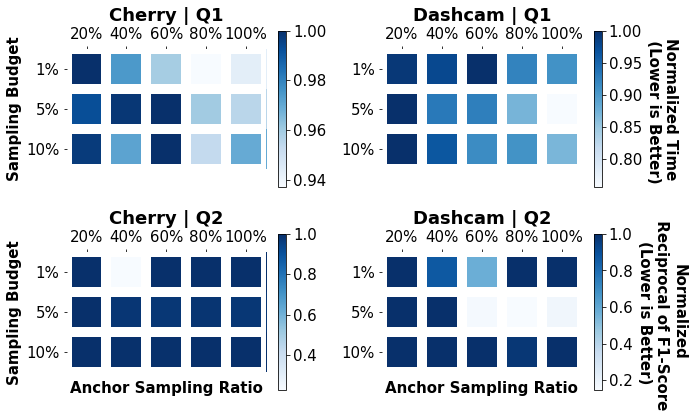

In [18]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {
        'weight' : 'normal',
        'size'   : 15}


matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)

row = ['1%', '5%', '10%']
col = ['20%', '40%', '60%', '80%', '100%']

rows = 2
columns = 2
fig_size = (10, 6)
fig, axes = plt.subplots(rows, columns, sharey = False, sharex=True, figsize=fig_size)

#fig, ax = plt.subplots()

im, cbar = heatmap(data1, col, row, ax=axes[0,0],
                   cmap="Blues", xlabel = '', title = 'Cherry | Q1')
#texts = annotate_heatmap(im, valfmt="{x:.1f}")

im, cbar = heatmap(data3, col, row, ax=axes[0,1],
                   cmap="Blues", ylabel = '', xlabel = '', title = 'Dashcam | Q1', cbarlabel="Normalized Time\n (Lower is Better)")

im, cbar = heatmap(data2, col, row, ax=axes[1,0],
                   cmap="Blues", xlabel = 'Anchor Sampling Ratio', title = 'Cherry | Q2')

im, cbar = heatmap(data4, col, row, ax=axes[1,1],
                   cmap="Blues", xlabel = 'Anchor Sampling Ratio', ylabel = '', title = 'Dashcam | Q2',  cbarlabel="Normalized\n Reciprocal of F1-Score\n(Lower is Better)")


fig.tight_layout()

plt.savefig('plots/rq3.png',  bbox_inches='tight')
plt.show()

In [2]:



def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", xlabel = 'C Param Value', ylabel = 'Sampling Budget',title = '', **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, weight = 'bold', va="bottom")
    print(col_labels)
    print(row_labels)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(row_labels, weight = 'normal')
    ax.set_yticklabels(col_labels, weight = 'normal')
    ax.set_xlabel(xlabel, weight = 'bold')
    ax.set_ylabel(ylabel, weight = 'bold')
    ax.set_title(title, weight = 'bold')

    
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), 
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=10)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [21]:
#### Data Logs
### data for q1

cherry_ic = [1.0710389316082,
 15.383615641189472,
 29.464398205812486,
 43.89342100811856,
 58.07528316708547,
 72.35027253574559]
cherry_q = [     84.324,        69.8,      54.851,       39.94,      24.578,      9.6502]


detrac_ic = [1.5058171339333057,
 12.327909092434815,
 22.83930432985936,
 33.62358132475189,
 44.15341447672674,
 55.206115334374566]
detrac_q = [     82.642,      70.249,      59.914,      47.818,      34.056,       24.74]

dashcam_ic = [1.206959567964077,
 12.324619951673917,
 22.604819027738912,
 33.79782994561962,
 43.98191894597241,
 54.671717691315074]
dashcam_q = [     84.619,      71.855,      60.019,      48.933,      33.928,       24.52]



In [22]:
cherry_p, cherry_r

([0.9320137693631669,
  0.9501276595744681,
  0.9549714337330353,
  0.9588087631218621,
  0.9572455802876249,
  0.9601903029454978],
 [0.1435514514204922,
  0.6165775637343701,
  0.934233199310741,
  0.9281800910175407,
  0.9234524808907347,
  0.9095568417797022])

In [23]:
#### data for q2
cherry_p = [0.9637119113573407,
  0.964120338278109,
  0.9656433558683365,
  0.9691447331812364,
  0.9655881127621164,
  0.953049703979072]
cherry_r = [0.9660132170822457,
  0.9654856444715944,
  0.9677347698117399,
  0.9672071972010885,
  0.9653468095740545,
  0.9610151607708114]
cherry_f = f1_score(cherry_p, cherry_r)

detrac_p = [0.9320137693631669,
  0.9501276595744681,
  0.9549714337330353,
  0.9588087631218621,
  0.9572455802876249,
  0.9601903029454978]
detrac_r = [0.1435514514204922,
  0.6165775637343701,
  0.934233199310741,
  0.9281800910175407,
  0.9234524808907347,
  0.9095568417797022]
detrac_f = f1_score(detrac_p, detrac_r)

dashcam_p = [0.9320137693631669,
  0.9501276595744681,
  0.9549714337330353,
  0.9588087631218621,
  0.9572455802876249,
  0.9601903029454978]
dashcam_r = [0.1435514514204922,
  0.6165775637343701,
  0.934233199310741,
  0.9281800910175407,
  0.9234524808907347,
  0.9095568417797022]
dashcam_f = f1_score(dashcam_p, dashcam_r)



In [25]:
detrac_f

[0.24878440981660863,
 0.7478463578998137,
 0.944488492333806,
 0.9432458523224748,
 0.940045426945825,
 0.9341879857053718]

In [24]:
percentages

[0, 0.2, 0.4, 0.6, 0.8, 1.0]

<ipython-input-27-8e1f5efaa55b>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right',rotation_mode='anchor')
<ipython-input-27-8e1f5efaa55b>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-27-8e1f5efaa55b>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-27-8e1f5efaa55b>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-27-8e1f5efaa55b>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha =

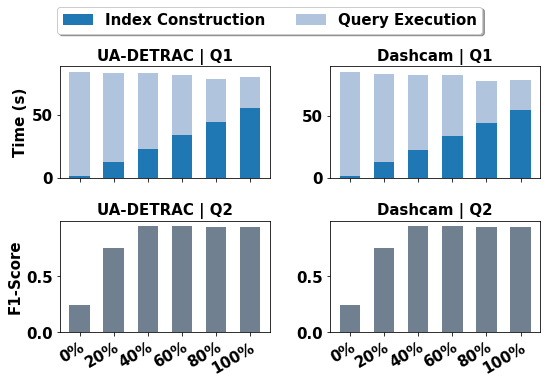

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)


x_axis_names = ['0%', '20%', '40%', '60%', '80%', '100%']

x = np.arange(len(x_axis_names))


### we need to do subplots
rows = 2
columns = 2
fig_size = (8, 5)
fig, axes = plt.subplots(rows, columns, sharey = False, sharex=True, figsize=fig_size)


i = 0
j = 0
width = 0.6

axes[i][j].bar(x_axis_names, detrac_ic, width, label='Index Construction')
axes[i][j].bar(x_axis_names, detrac_q, width, bottom = detrac_ic, label='Query Execution', color = 'lightsteelblue')
axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
#axes[i][j].set_ylim(0, 200)
#axes[i][j].set_yticks([0, 50, 100, 150, 200])

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right',rotation_mode='anchor')
#plt.ylim(0, 2)
#plt.xticks(x, x_axis_names)
axes[i][j].set_title('UA-DETRAC | Q1', weight = 'bold', size = 15)


i = 0
j = 1

axes[i][j].bar(x_axis_names, dashcam_ic, width, label='Index Construction')
axes[i][j].bar(x_axis_names, dashcam_q, width, bottom = dashcam_ic, label='Query Execution', color = 'lightsteelblue')
axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
#axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
axes[i][j].set_title('Dashcam | Q1', weight = 'bold', size = 15)

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')


i = 1
j = 0

axes[i][j].bar(x_axis_names, detrac_f, width, label='F1-Score', color = 'slategray')
axes[i][j].set_title('UA-DETRAC | Q2', weight = 'bold', size = 15)
axes[i][j].set_ylabel('F1-Score', weight = 'bold', size = 15)
axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')



i = 1
j = 1
axes[i][j].bar(x_axis_names, dashcam_f, width, label='F1-Score', color = 'slategray')

axes[i][j].set_title('Dashcam | Q2', weight = 'bold', size = 15)
#axes[i][j].set_ylabel('F1-Score', weight = 'bold', size = 15)

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')




plt.tight_layout()

lgd = axes[0][0].legend(loc='upper center', bbox_to_anchor=(1, 1.6),
          fancybox=True, shadow=True, ncol=10)


#plt.legend()
plt.savefig('plots/rq3.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Post Analysis

In [29]:
print('hello world')

hello world


In [30]:
images.shape

(74880, 540, 960, 3)

In [33]:
### we will have to get 3 things
### 1. GT_retrieval
### 2. eko labels
### 3. anchor locations


ekos, percentages

([EKO, EKO, EKO, EKO, EKO, EKO], [0, 0.2, 0.4, 0.6, 0.8, 1.0])

In [70]:
### define a label smoothing function

def label_smoothing(labels):
    new_labels = []
    smooth_rate = 15
    for i in range(len(labels)):
        start = max(i - smooth_rate, 0)
        end = min(i + smooth_rate, len(labels) - 1)
        candidates = labels[start:end]
        if sum(candidates) / len(candidates) >= 0.5:
            new_labels.append(1)
        else: 
            new_labels.append(0)
            
    return np.array(new_labels)

In [71]:
gt_smooth = label_smoothing(gt_retrieval)

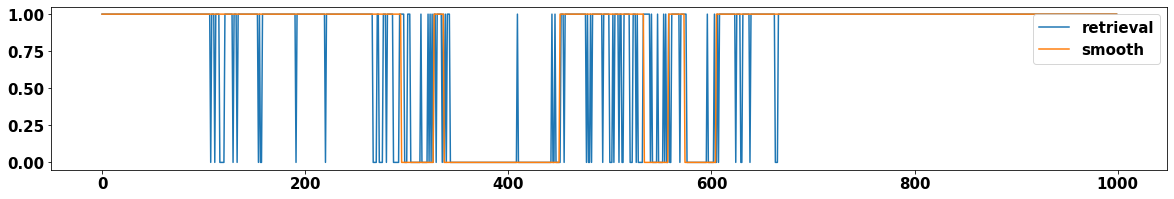

In [72]:
plt.figure(figsize = (20, 3))
plt.plot(gt_retrieval[0:1000], label = 'retrieval')
plt.plot(gt_smooth[0:1000], label = 'smooth')
plt.legend()

In [77]:
sum(gt_smooth)

45234

In [78]:
sum(gt_retrieval)

45266.0

In [73]:

cherry_p = []
cherry_r = []
dnn_invocation = int(len(images) * 0.1)
for eko in ekos:
    
    query = get_labels(eko)
    a = query.y_pred
    b = query.y_true
    eko_pred = a
    precision, recall = query_process_precision(None, dnn_invocation = dnn_invocation, y = (eko_pred, gt_smooth))
    cherry_p.append(precision)
    cherry_r.append(recall)

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

In [76]:
cherry_p, cherry_r

([0.9679339948712231,
  0.9646349304893461,
  0.9626552368392131,
  0.9658002129169624,
  0.958443815593039,
  0.9664824961599303],
 [0.9596100278551533,
  0.9617986470354158,
  0.968209753725074,
  0.9626829376132997,
  0.950921872927444,
  0.9319759472962815])

In [75]:
f1_score(cherry_p, cherry_r)    

[0.9637540381220928,
 0.9632147008357779,
 0.9654245059462795,
 0.9642390558225017,
 0.9546680279204999,
 0.9489156246834659]

In [34]:
### What's the difference between 0 and 1.0?

### get the gt_retrieval


from eko_paper2022.motivation.main import execute_ekoalt
from eko_paper2022.experiments.main import *


eko = execute_ekoalt(images, video_name, nb_buckets = 70000)

from eko_paper2022.experiments.main import *


query = get_labels(eko)
a = query.y_pred
b = query.y_true
gt_retrieval = []
for bb in b:
    gt_retrieval.append(float(bb))
gt_retrieval = np.array(gt_retrieval)




index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.8 70000
rep indices stats 70000 74880
74880 70000
bucketing complete!


Target DNN Invocations:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

In [35]:
sum(gt_retrieval)

45266.0

In [36]:
eko0 = ekos[0]
eko1 = ekos[-1]

In [37]:
query = get_labels(eko0)
eko0_labels = query.y_pred
query = get_labels(eko1)
eko1_labels = query.y_pred

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

In [48]:
eko0_reps = np.array(eko0.reps)
eko1_reps = np.array(eko1.reps)







In [ ]:
#### plotting the rep locations..



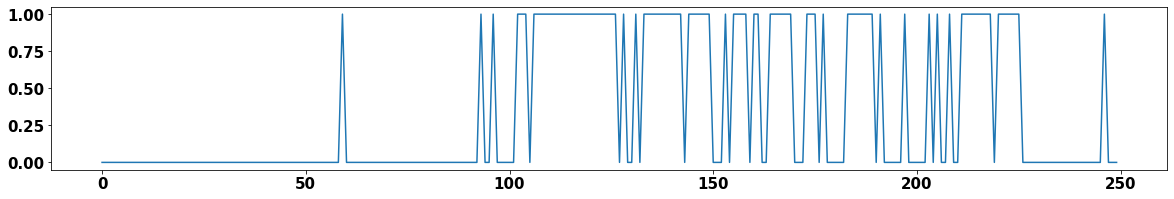

In [59]:
start, end = 350, 600
plt.figure(figsize = (20, 3))
plt.plot(gt_retrieval[start:end])

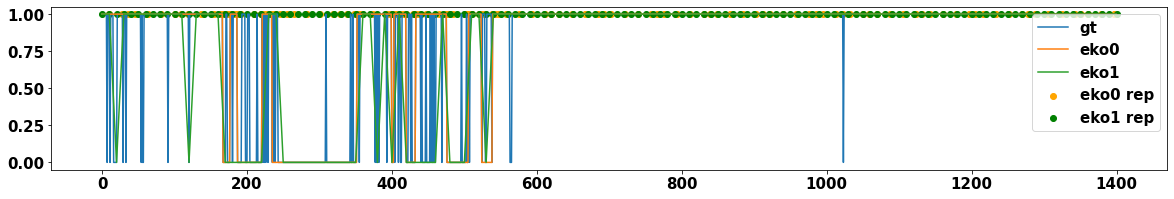

In [53]:
### now, we have everything.... gt, proposed, and anchor locations.
start, end = 100, 1500
import matplotlib.pyplot as plt
plt.figure(figsize = (20,3))
plt.plot(gt_retrieval[start:end], label = 'gt')
plt.plot(eko0_labels[start:end], label = 'eko0')
plt.plot(eko1_labels[start:end], label = 'eko1')



### determine the points that fall between start and end
tmp0 = eko0_reps[eko0_reps >= start]
tmp0 = tmp0[tmp0 <= end]
tmp0 -= start
y_tmp = np.ones(len(tmp0))
plt.scatter(tmp0, y_tmp, label = 'eko0 rep', color = 'orange')

tmp1 = eko1_reps[eko1_reps >= start]
tmp1 = tmp1[tmp1 <= end]
tmp1 -= start
y_tmp = np.ones(len(tmp1))
plt.scatter(tmp1, y_tmp, label = 'eko1 rep', color = 'green')




plt.legend()


<ipython-input-41-e86f97b394b6>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right',rotation_mode='anchor')
<ipython-input-41-e86f97b394b6>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-41-e86f97b394b6>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-41-e86f97b394b6>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-41-e86f97b394b6>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha =

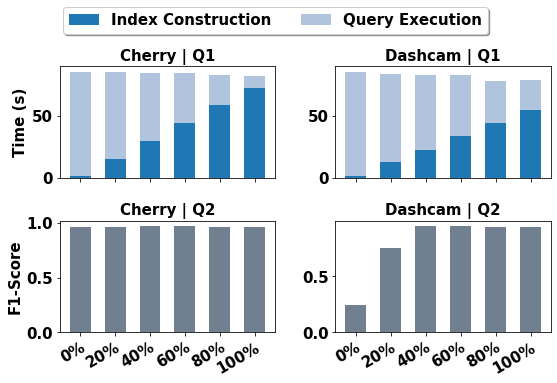

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)


x_axis_names = ['0%', '20%', '40%', '60%', '80%', '100%']

x = np.arange(len(x_axis_names))


### we need to do subplots
rows = 2
columns = 2
fig_size = (8, 5)
fig, axes = plt.subplots(rows, columns, sharey = False, sharex=True, figsize=fig_size)


i = 0
j = 0
width = 0.6

axes[i][j].bar(x_axis_names, cherry_ic, width, label='Index Construction')
axes[i][j].bar(x_axis_names, cherry_q, width, bottom = cherry_ic, label='Query Execution', color = 'lightsteelblue')
axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
#axes[i][j].set_ylim(0, 200)
#axes[i][j].set_yticks([0, 50, 100, 150, 200])

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right',rotation_mode='anchor')
#plt.ylim(0, 2)
#plt.xticks(x, x_axis_names)
axes[i][j].set_title('Cherry | Q1', weight = 'bold', size = 15)


i = 0
j = 1

axes[i][j].bar(x_axis_names, dashcam_ic, width, label='Index Construction')
axes[i][j].bar(x_axis_names, dashcam_q, width, bottom = dashcam_ic, label='Query Execution', color = 'lightsteelblue')
axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
#axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
axes[i][j].set_title('Dashcam | Q1', weight = 'bold', size = 15)

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')


i = 1
j = 0

axes[i][j].bar(x_axis_names, cherry_f, width, label='F1-Score', color = 'slategray')
axes[i][j].set_title('Cherry | Q2', weight = 'bold', size = 15)
axes[i][j].set_ylabel('F1-Score', weight = 'bold', size = 15)
axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')



i = 1
j = 1
axes[i][j].bar(x_axis_names, dashcam_f, width, label='F1-Score', color = 'slategray')

axes[i][j].set_title('Dashcam | Q2', weight = 'bold', size = 15)
#axes[i][j].set_ylabel('F1-Score', weight = 'bold', size = 15)

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')




plt.tight_layout()

lgd = axes[0][0].legend(loc='upper center', bbox_to_anchor=(1, 1.6),
          fancybox=True, shadow=True, ncol=10)


#plt.legend()
plt.savefig('plots/rq3.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
### we need to show reasons why this is so... 
### for example, why are the results in dashcam for 0% so low? What is missing?

### Old Graph

In [ ]:


index_construction_times = [1.00, 0.85, 1.04, 0.92, 0.93, 0.95]
t1 = [10.22, 10.44, 9.37, 9.55, 9.490, 9.01]
    


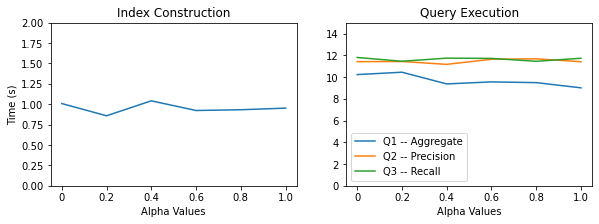

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_axis_names = percentages

x = np.arange(len(x_axis_names))
width = 0.2


### we need to do subplots
rows = 1
columns = 3
i = 1
fig = plt.figure(figsize = (15,3))
fig.add_subplot(rows, columns, i)
plt.plot(ic_times)
plt.ylabel('Time (s)')
plt.xlabel('Alpha Values')
plt.ylim(0, 2)
plt.xticks(x, x_axis_names)
plt.title('Index Construction')





i = 2
fig.add_subplot(rows, columns, i)

plt.plot(t1, label = 'Q1 -- Aggregate')
plt.xticks(x, x_axis_names)
plt.title('Query Execution')
plt.ylim(0, 15)
plt.xlabel('Alpha Values')

plt.legend()
plt.show()

